In [310]:
## Imports
import numpy as np
import os
import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from os import listdir
from PIL import Image
from matplotlib.image import imread

import seaborn as sns
import random

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
#from tensorflow.keras.constraints import maxnorm
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [311]:
tf.random.set_seed(42)

In [312]:
### Data Directory 

data_dir = "C:\\Users\\abhin\\Downloads\\Image Dataset\\Pokemon Detection\\pokemoncv\\"

### Listsing Data
listdir(data_dir)

['Label_Name.csv', 'Test', 'Train']

In [313]:
### Reading Labels 
Labels = pd.read_csv(data_dir+'Label_Name.csv')

In [314]:
## Test path 
test_path = data_dir+'Test\\Test_Images\\'
## Train Path
train_path = data_dir+'Train\\Train_Images\\'

path:  C:\Users\abhin\Downloads\Image Dataset\Pokemon Detection\pokemoncv\Train\Train_Images\021ce15341da49118d09b2e62373321b.jpg
Dimensions: (663, 665, 3)


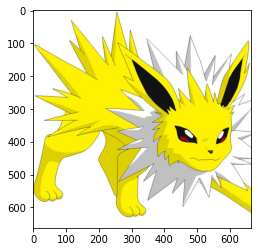

In [315]:
## read Image 

pokemon = train_path+os.listdir(train_path)[57]

print("path: ",pokemon)

print("Dimensions:",(plt.imread(pokemon)).shape)

plt.imshow(imread(pokemon))

In [316]:
## Size of Data

print("Train Data :" , len(listdir(train_path)))

print("Test Data :" , len(listdir(test_path)))

Train Data : 1797
Test Data : 436


In [317]:
### Reading the dimesions of Train size 

dim1 = []

dim2 = []

bad_image = []


for image in listdir(train_path):

  try:
      img = Image.open(train_path+image)
      img.verify()     # to verfy if its an img
      img.close()     #to close img and free memory space
    
      img = plt.imread(train_path+image)   ### Reading the image 
      d1,d2,colors = img.shape             ### Storing the dimensions
      dim1.append(d1)                      ## Storing dimension 1
      dim2.append(d2)                       ## Storing dimension 2
  except (IOError, SyntaxError,ValueError) as e:
      print('Bad file:', image)
      bad_image.append(image)

Bad file: 00000044.png
Bad file: 00000055.png
Bad file: 200010472.png
Bad file: 200010481.png


In [318]:
### Lenghth of images for training  + image discareded == Total images in train
len(dim1) + len(bad_image) == len(listdir(train_path))

True

In [319]:
### Labels 
Labels

## Train Labels

train_labels = pd.read_csv(data_dir+"Train/Train_Data_Labels.csv")

In [320]:
Labels

,Label,Pokemon_Name
0,0.0,Articuno
1,1.0,Blastoise
2,2.0,Charmander
3,3.0,Charmeleon
4,4.0,Cloyster
5,5.0,Gastly
6,6.0,Gengar
7,7.0,Gloom
8,8.0,Golbat
9,9.0,Golem


In [321]:
train_labels

,FileName,Label
0,00000011.png,31.0
1,962696ee8df246c1b4157ba5e8b1529c.jpg,26.0
2,98eab0a1af5043d4b33f4cecf73e48dc.jpg,37.0
3,6c22904780ce4b93b700ea17d7e46746.jpg,16.0
4,51fc29cf72494fc78db5e31539b60729.jpg,14.0
...,...,...
1792,8fbc52e65bdb4c768d037af33d947d53.jpg,11.0
1793,1058c2e931134387a008512071057a77.jpg,38.0
1794,905527f5dd374fbe8086a51c85d31587.jpg,16.0
1795,7c870a2696754f1f810bc11ad103756c.jpg,44.0


In [322]:
## forming y_train label
y=[]
for img in listdir(train_path):
    if img in bad_image:
        pass
    else:
        y.append(train_labels[train_labels['FileName']==img]['Label'].values[0])

In [323]:
len(y) == len(dim1)

True

In [324]:
y

[2.0,
 31.0,
 23.0,
 31.0,
 2.0,
 2.0,
 23.0,
 2.0,
 23.0,
 23.0,
 31.0,
 23.0,
 2.0,
 31.0,
 23.0,
 31.0,
 31.0,
 2.0,
 31.0,
 23.0,
 31.0,
 2.0,
 23.0,
 31.0,
 23.0,
 31.0,
 31.0,
 23.0,
 2.0,
 31.0,
 23.0,
 2.0,
 31.0,
 2.0,
 23.0,
 23.0,
 2.0,
 2.0,
 31.0,
 31.0,
 23.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 40.0,
 27.0,
 21.0,
 27.0,
 11.0,
 14.0,
 22.0,
 31.0,
 35.0,
 13.0,
 13.0,
 10.0,
 21.0,
 21.0,
 36.0,
 11.0,
 49.0,
 21.0,
 37.0,
 26.0,
 18.0,
 27.0,
 26.0,
 48.0,
 20.0,
 15.0,
 8.0,
 27.0,
 20.0,
 0.0,
 14.0,
 44.0,
 8.0,
 13.0,
 14.0,
 31.0,
 20.0,
 38.0,
 9.0,
 38.0,
 33.0,
 17.0,
 19.0,
 23.0,
 14.0,
 16.0,
 22.0,
 23.0,
 45.0,
 20.0,
 43.0,
 35.0,
 41.0,
 11.0,
 22.0,
 32.0,
 10.0,
 4.0,
 15.0,
 36.0,
 32.0,
 34.0,
 13.0,
 23.0,
 36.0,
 2.0,
 27.0,
 21.0,
 8.0,
 40.0,
 41.0,
 44.0,
 22.0,
 45.0,
 4.0,
 0.0,
 25.0,
 24.0,
 4.0,
 14.0,
 14.0,
 31.0,
 26.0,
 32.0,
 44.0,
 30.0,
 16.0,
 28.0,
 29.0,
 2.0,
 34.0,
 15.0,
 16.0,
 24.0,
 3.0,
 36.0,
 31.0,
 2.0,
 45.0,
 8.0,
 38.

In [325]:
## Converting Y labels to one hot encode
y= pd.get_dummies(y)

In [326]:
##
y

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1789,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1790,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
## Shape of Y 
y.shape

(1793, 50)

In [328]:
y = np.array(y)

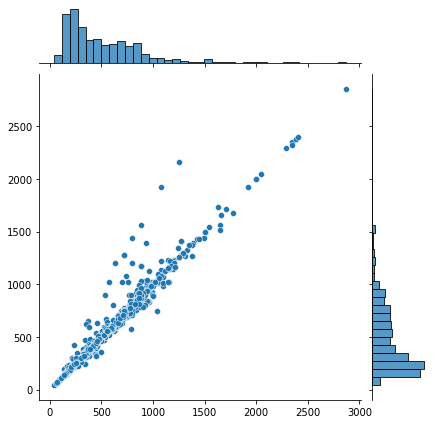

In [329]:
### Visualizing Dimensions of the train images

sns.jointplot(x=dim1,y=dim2)

In [330]:
## Verify y Label

len(y) == len(dim1)

True

In [331]:
np.mean(dim1)

490.23201338538763

In [332]:
np.mean(dim2)

495.7473508087005

In [333]:
np.mean(([np.mean(dim1),np.mean(dim2)]))

492.98968209704407

In [334]:
### resizing images to add uniformity in shape
image_shape = (150,150,3)

In [335]:
### Loading Image Data Set

## necessary imports 
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split


In [336]:
### loading data

X=[]
for i in listdir(train_path):
    if i in bad_image:
        pass
    else:
        img = image.load_img(train_path+i,target_size=image_shape)
        img = image.img_to_array(img)
        img = img/255
        X.append(img)
        
X = np.array(X)

In [337]:
len(X) == len(y)

True

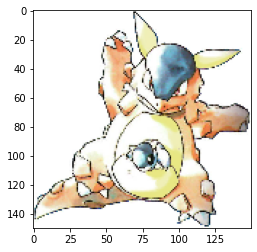

In [338]:
## Visualizing Input

plt.imshow(X[random.randint(0,len(X))])

In [339]:
### Shapes of X and Y 


print("X :",X.shape)

print("\nY :", y.shape)

X : (1793, 150, 150, 3)

Y : (1793, 50)


In [340]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [341]:
### Bulding A CNN 

In [342]:
## Defining Model
def pure_cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=image_shape))    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))  
    model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))    
    model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))    
    
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (1, 1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(50, (1, 1), padding='valid'))

    model.add(GlobalAveragePooling2D())
    
    model.add(Activation('softmax'))

    model.summary()
    
    return model

In [343]:
augmented_model = pure_cnn_model()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
dropout_18 (Dropout)         (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
dropout_19 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 75, 75, 64)       

In [344]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [345]:
augmented_checkpoint = ModelCheckpoint('augmented_best_model.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [346]:
augmented_model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

In [347]:
### Params
NUM_EPOCH = 1000

In [348]:

augmented_model_details = augmented_model.fit(datagen.flow(X_train, y_train, batch_size = 8),
                    steps_per_epoch = len(X_train) / 32, # number of samples per gradient update
                    epochs = NUM_EPOCH, # number of iterations
                    validation_data= (X_test, y_test),
                    callbacks=[augmented_checkpoint],
                    verbose=1)

Epoch 1/1000
37/37 [==============================] - 6s 109ms/step - loss: 3.8992 - accuracy: 0.0263 - val_loss: 3.9081 - val_accuracy: 0.0169
Epoch 2/1000
37/37 [==============================] - 2s 54ms/step - loss: 3.9076 - accuracy: 0.0263 - val_loss: 3.9049 - val_accuracy: 0.0169
Epoch 3/1000
37/37 [==============================] - 2s 55ms/step - loss: 3.8963 - accuracy: 0.0230 - val_loss: 3.9028 - val_accuracy: 0.0118
Epoch 4/1000
37/37 [==============================] - 2s 56ms/step - loss: 3.8936 - accuracy: 0.0164 - val_loss: 3.8941 - val_accuracy: 0.0220
Epoch 5/1000
37/37 [==============================] - 2s 59ms/step - loss: 3.8886 - accuracy: 0.0296 - val_loss: 3.8848 - val_accuracy: 0.0118
Epoch 6/1000
37/37 [==============================] - 2s 59ms/step - loss: 3.8572 - accuracy: 0.0625 - val_loss: 3.9078 - val_accuracy: 0.0118
Epoch 7/1000
37/37 [==============================] - 2s 59ms/step - loss: 3.8833 - accuracy: 0.0296 - val_loss: 3.8805 - val_accuracy: 0.011

Epoch 58/1000
37/37 [==============================] - 2s 63ms/step - loss: 2.8097 - accuracy: 0.1875 - val_loss: 3.3960 - val_accuracy: 0.1047
Epoch 59/1000
37/37 [==============================] - 3s 82ms/step - loss: 2.8244 - accuracy: 0.2204 - val_loss: 2.9297 - val_accuracy: 0.2466
Epoch 60/1000
37/37 [==============================] - 2s 63ms/step - loss: 2.6930 - accuracy: 0.2138 - val_loss: 3.0829 - val_accuracy: 0.1875
Epoch 61/1000
37/37 [==============================] - 2s 66ms/step - loss: 2.6412 - accuracy: 0.2434 - val_loss: 2.9631 - val_accuracy: 0.1892
Epoch 62/1000
37/37 [==============================] - 2s 62ms/step - loss: 2.6186 - accuracy: 0.2007 - val_loss: 2.9418 - val_accuracy: 0.2044
Epoch 63/1000
37/37 [==============================] - 2s 66ms/step - loss: 2.8132 - accuracy: 0.1941 - val_loss: 2.8887 - val_accuracy: 0.2196
Epoch 64/1000
37/37 [==============================] - 2s 62ms/step - loss: 2.5727 - accuracy: 0.2697 - val_loss: 2.9511 - val_accuracy:

Epoch 115/1000
37/37 [==============================] - 2s 65ms/step - loss: 1.9450 - accuracy: 0.4007 - val_loss: 2.4563 - val_accuracy: 0.4139
Epoch 116/1000
37/37 [==============================] - 2s 62ms/step - loss: 1.9185 - accuracy: 0.4375 - val_loss: 2.3790 - val_accuracy: 0.3868
Epoch 117/1000
37/37 [==============================] - 3s 72ms/step - loss: 1.8543 - accuracy: 0.4175 - val_loss: 2.6620 - val_accuracy: 0.3666
Epoch 118/1000
37/37 [==============================] - 4s 95ms/step - loss: 1.9332 - accuracy: 0.4013 - val_loss: 2.3102 - val_accuracy: 0.4223
Epoch 119/1000
37/37 [==============================] - 2s 64ms/step - loss: 1.9204 - accuracy: 0.4178 - val_loss: 2.2334 - val_accuracy: 0.4122
Epoch 120/1000
37/37 [==============================] - 3s 67ms/step - loss: 1.8461 - accuracy: 0.4704 - val_loss: 2.2240 - val_accuracy: 0.4003
Epoch 121/1000
37/37 [==============================] - 2s 64ms/step - loss: 2.0007 - accuracy: 0.4046 - val_loss: 2.3340 - val_ac

37/37 [==============================] - 2s 64ms/step - loss: 1.1262 - accuracy: 0.6776 - val_loss: 2.9161 - val_accuracy: 0.4578
Epoch 228/1000
37/37 [==============================] - 2s 63ms/step - loss: 1.1583 - accuracy: 0.6250 - val_loss: 2.1054 - val_accuracy: 0.5439
Epoch 229/1000
37/37 [==============================] - 2s 63ms/step - loss: 1.0441 - accuracy: 0.6842 - val_loss: 2.5022 - val_accuracy: 0.5034
Epoch 230/1000
37/37 [==============================] - 2s 63ms/step - loss: 1.1412 - accuracy: 0.6283 - val_loss: 2.2035 - val_accuracy: 0.5287
Epoch 231/1000
37/37 [==============================] - 3s 68ms/step - loss: 1.1519 - accuracy: 0.6382 - val_loss: 2.1934 - val_accuracy: 0.5169
Epoch 232/1000
37/37 [==============================] - 3s 68ms/step - loss: 1.0214 - accuracy: 0.6842 - val_loss: 2.2233 - val_accuracy: 0.5439
Epoch 233/1000
37/37 [==============================] - 3s 66ms/step - loss: 0.9599 - accuracy: 0.6776 - val_loss: 2.1186 - val_accuracy: 0.5473


37/37 [==============================] - 3s 75ms/step - loss: 0.5223 - accuracy: 0.8355 - val_loss: 2.3511 - val_accuracy: 0.5946
Epoch 340/1000
37/37 [==============================] - 3s 70ms/step - loss: 0.6148 - accuracy: 0.7993 - val_loss: 2.4014 - val_accuracy: 0.6081
Epoch 341/1000
37/37 [==============================] - 3s 67ms/step - loss: 0.6962 - accuracy: 0.7862 - val_loss: 2.1633 - val_accuracy: 0.5726
Epoch 342/1000
37/37 [==============================] - 2s 62ms/step - loss: 0.5856 - accuracy: 0.8148 - val_loss: 2.2844 - val_accuracy: 0.5591
Epoch 343/1000
37/37 [==============================] - 3s 69ms/step - loss: 0.7648 - accuracy: 0.7845 - val_loss: 2.3078 - val_accuracy: 0.5591
Epoch 344/1000
37/37 [==============================] - 2s 63ms/step - loss: 0.7508 - accuracy: 0.7829 - val_loss: 2.2301 - val_accuracy: 0.5101
Epoch 345/1000
37/37 [==============================] - 3s 68ms/step - loss: 0.7285 - accuracy: 0.7599 - val_loss: 2.6390 - val_accuracy: 0.5490


37/37 [==============================] - 3s 83ms/step - loss: 0.4745 - accuracy: 0.8487 - val_loss: 2.4177 - val_accuracy: 0.5861
Epoch 452/1000
37/37 [==============================] - 3s 70ms/step - loss: 0.5080 - accuracy: 0.8059 - val_loss: 2.5866 - val_accuracy: 0.6132
Epoch 453/1000
37/37 [==============================] - 4s 100ms/step - loss: 0.5338 - accuracy: 0.8289 - val_loss: 2.4825 - val_accuracy: 0.5861
Epoch 454/1000
37/37 [==============================] - 5s 122ms/step - loss: 0.4752 - accuracy: 0.8388 - val_loss: 2.3054 - val_accuracy: 0.6081
Epoch 455/1000
37/37 [==============================] - 2s 64ms/step - loss: 0.3844 - accuracy: 0.8487 - val_loss: 2.4770 - val_accuracy: 0.5709
Epoch 456/1000
 8/37 [=====>........................] - ETA: 2s - loss: 0.6457 - accuracy: 0.7969

KeyboardInterrupt: 

In [349]:
model = augmented_model

In [350]:
### Learning Curve Function

def plot_learningcurve(history,epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()




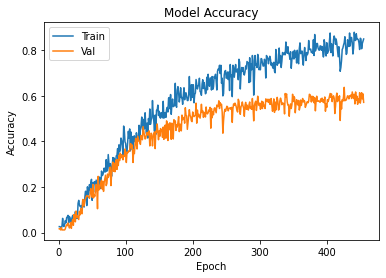

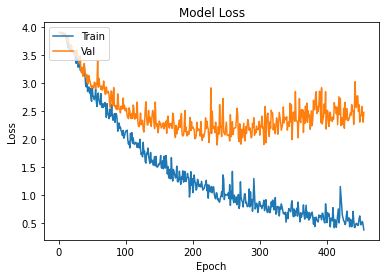

In [352]:
plot_learningcurve(history=model.history,epoch=455)

In [353]:
#model.save(data_dir+'Poke.h5')

In [354]:
pred = model.predict(X_test)

In [355]:
pred

array([[9.54662767e-08, 1.86676174e-04, 1.31727935e-08, ...,
        3.21441576e-07, 9.45936845e-05, 2.63514949e-07],
       [1.56598588e-11, 2.54142238e-03, 1.16704564e-06, ...,
        3.16112150e-08, 4.60300278e-08, 6.87651678e-08],
       [4.34189455e-11, 5.93987352e-06, 2.40682478e-08, ...,
        4.48209130e-06, 1.72522621e-11, 8.01850200e-01],
       ...,
       [5.06767388e-30, 9.93715266e-12, 9.15404197e-09, ...,
        1.31159388e-15, 2.01881899e-17, 3.43430950e-10],
       [4.59716648e-06, 4.89316426e-06, 1.92148991e-10, ...,
        4.71277684e-02, 4.30288346e-04, 7.74099451e-09],
       [6.50407373e-26, 9.15618476e-15, 6.66061283e-07, ...,
        6.83879632e-32, 1.02442408e-13, 1.94754996e-19]], dtype=float32)

In [356]:
y_pred = []

for p in pred:
  y_pred.append(np.argmax(p))

In [357]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [358]:
y_test = [np.argmax(y) for y in y_test]

In [359]:
print("Accuracy Score : ",(accuracy_score(y_test,y_pred)*100).round(2))

Accuracy Score :  60.14


In [360]:
print('\n*Classification Report:\n', classification_report(y_test, y_pred))
confusion_matrix_graph = confusion_matrix(y_test, y_pred);


*Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.33      0.25      0.29         4
           2       0.80      0.89      0.84         9
           3       0.60      0.46      0.52        13
           4       0.71      0.38      0.50        13
           5       0.29      0.33      0.31         6
           6       1.00      0.76      0.87        17
           7       0.65      0.79      0.71        14
           8       1.00      0.64      0.78        11
           9       0.60      0.50      0.55        18
          10       0.43      0.77      0.56        13
          11       0.71      0.79      0.75        19
          12       0.00      0.00      0.00         2
          13       0.67      0.75      0.71        16
          14       0.80      1.00      0.89        12
          15       0.75      1.00      0.86        15
          16       0.60      0.60      0.60        15
 

In [361]:
confusion_matrix_graph = confusion_matrix(y_test,y_pred)

In [362]:
print(confusion_matrix_graph)

[[6 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 8 0]
 [0 0 0 ... 0 0 9]]


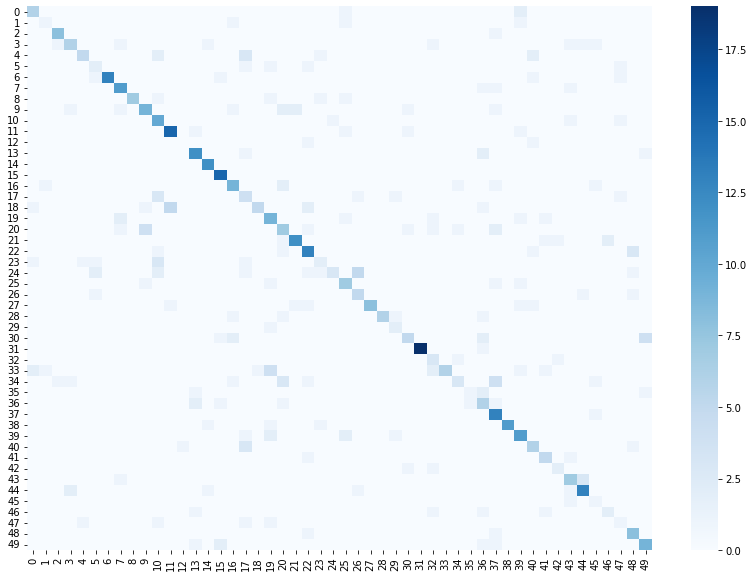

In [363]:
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix_graph,cmap='Blues');

In [364]:
submission = pd.read_csv(data_dir+'Test/submission.csv')

In [365]:
X=[]
for i in listdir(test_path):
  img = image.load_img(test_path+i,target_size=image_shape)
  img = image.img_to_array(img)
  img = img/255
  X.append(img)
        
X = np.array(X)

In [366]:
len(submission) == len(X)

True

In [367]:
yt_pred = model.predict(X)



In [368]:
yt_pred = [np.argmax(y) for y in yt_pred]

In [369]:
len(X) == len(yt_pred)

True

In [370]:
pred_labels = []

for p in yt_pred:
  pred_labels.append(Labels.iloc[p]['Pokemon_Name'])

In [371]:
len(pred_labels) == len(submission) == len(X)

True

In [372]:
submission['Label'] = pred_labels

In [373]:
submission.to_csv(data_dir+'Test/submission.csv',index = False)

In [374]:
submission.iloc[205]

FileName    ab001aq174126.jpg
Label                  Horsea
Name: 205, dtype: object

In [375]:
submission.iloc[106]

FileName    ab001aq130317.jpg
Label              Kangaskhan
Name: 106, dtype: object

In [376]:
submission[submission['FileName']=='ab001aq174126.jpg']

,FileName,Label
205,ab001aq174126.jpg,Horsea


In [377]:
### Augumented Model